## <font color="#0F1518">The role of news media in Argentina</font>

## <font color="#0F1518">1. Introduction</font>

In Argentina, the role of news media has always been determined by its political positioning. Most aspects of argentine society are highly politicized, and this is taken as an unquestionable truth by everyone. Of course the following analysis could be applied to other countries, and by no means we can assure that this characteristics are unique for Argentina. 
  
News media is the embodiment of this reality, and it doesn’t take a lot of reading to identify the stand each different company takes, deepening the fractures of a society constantly polarized not only by its own decisions, but by its context as well.   
We could apply this analysis to other geopolitical and historical realities and it would more than likely still be fitting. Political agenda is as old as human experience, but there is something at least as old: profit. One may argue that considering news media a biased industry, always aligning behind a political force, might be at some point a bit simplistic. And perhaps this criticism, although highly hypocritical, would not be entirely false. However, the pursuit of profit is an undeniable fact.  
  
But we feel compelled to restate a concept that might seem rather obvious, as it indirectly is the stepping stone of the current analysis. And it is that the driving force of most mass media companies is to make profit. From this reaffirmation we can derive that they are not very interested in delivering meaningful and useful information, but in increasing the amount of consumers. And because of this, we understand that in order to accomplish that goal, its necessary to sell a product that people want to consume.  
  
So, in simple terms, if we consider that what news companies sell is what people want to buy, then our main goal is to simply analyze what type of news people are interested in. Do they see the news website as a tool to enlighten themselves, to try to understand the events that at some point will take direct evet in their own lives? Or they see it as just another entertainment product? Which topics raise more interest? Also, at what level is a current trend exploited? In this report we will try to answer this questions as well as to throw some light on the part that news media play in argentine society, and the themes more present in everyday life.


## <font color="#0F1518">2. Methodology</font>

In [1]:
import pandas as pd
df = pd.read_csv(r"clarin\data_files\clarin_master.csv", nrows=0)
df.reset_index(drop=True, inplace=True)

The sources selected for the analysis are based on a research by Eugenia Mitchelstein and Pablo J. Boczkowski from the Center for the Study of Media and Society, Argentina (MESO), and published in the University of Oxford's Reuters Institute Digital News Report 2019 (http://www.digitalnewsreport.org/survey/2019/argentina-2019). There they point the following as the four most visited online news sources: Infobae, Todo Noticias/TN, Clarin and La Nación. This information is supported by a more recent study made by Comscore (https://www.totalmedios.com/nota/41753/sitios-de-noticias-digitales-infobae-fue-el-medio-mas-leido-en-marzo), which details the amount of unique visitors per site in the march of 2020: Infobae (26.539.552), Clarin (25.400.578), La Nación (20.734.990), Todo Noticias (12.687.000). To put this numbers in context, acording to the National Institute of Statistics and Census of Argentina the estimated population is 45.367.763 (https://www.indec.gob.ar).
  
In regards to the samples used, when we first started this project our first impulse was to analyze the total amount of articles from each website. However, because they organize their articles based on their level of interest, we soon realized that the ones exposed in the home page were much more important to determine the relevance of each individual topic.  
  
The language utilized to perform all the tasks pertinent to this project is Python, and each step required the application of some of its libraries and packages:  
  
1. Web data extraction. With the help of Beautiful Soup, we parsed the main pages of each website and pulled all the URLs. Following this we identified patterns in the URLs that contained articles and created a filter. Finally, we parsed each article page in order to extract meaningful information. A slightly different approach was taken for Clarin and La Nacion. As they have the infinite scrolling feature implemented in their main sites, we had to use Selenium to simulate said feature in order to cover all the articles. Once all the URLs were extracted, we continued working with Beautiful Soup. We did this to try to standardize our programs as best as possible considering the different structures of each website. This was proven helpful for quick maintenance and control.  
2. Dataframe and file creation. All the gathered data was then loaded into a Pandas data frame according to the following schema:  

In [2]:
df

,date,topic,article_name,url,media_name,extraction_date


  
  
  * This data frame was first appended to an existing CSV master file and also a new one was generated for each specific day. A JSON file for the text of each article was also created, with the keys being the name of the article. Immediately after this we performed a load check of the files and updated a log file for control.

The steps detailed above were taken on daily basis, any time from 16:00 to 19:00 Argentine Time (UTC-3), for a total of 30 days. Our first intention was to schedule this scripts automatically, however that was proven rather inconvenient. Although the programs were written in a way they would continue running when non-essential conditions were not met, my intention was to prevent as much data loss as possible. Unfortunately, it was not uncommon for new articles pages to have a different structure than the one that was identified as standard. Therefore, I felt compelled to monitor the functioning of the programs in real time to prevent mayor losses.

3. Cleaning and Queries. Once we had all the gathered data, we created a new Pandas data frame from the master CSV file. It was necessary to translate the topics, and also to reclassify certain articles in order to make it more coherent between all four news sites. We then wrote queries that would be useful for the next stage.
4. Analysis and visualization. With the assistance of Matplotlib library, we plotted figures that would help us identify significant trends and patterns.

## <font color="#0F1518">3. Data cleansing</font>

In [3]:
from datetime import datetime
import numpy as np
import json
import re
%matplotlib inline
from matplotlib.gridspec import GridSpec
from matplotlib.legend import Legend
import matplotlib.patches as mpatches
import seaborn as sns
from matplotlib.lines import Line2D
from matplotlib import pyplot as plt

df_clarin = pd.read_csv(r"clarin\data_files\clarin_master.csv")
df_infobae = pd.read_csv(r"infobae\data_files\infobae_master.csv")
df_lanacion = pd.read_csv(r"lanacion\data_files\lanacion_master.csv")
df_tn = pd.read_csv(r"todonoticias\data_files\todonoticias_master.csv")
df_pieces = [df_clarin, df_tn, df_infobae, df_lanacion]
df = pd.concat(df_pieces)
df.reset_index(drop=True, inplace=True)

#Media dictionary
media_name_list = {"clarin": ["Clarin", "#A75050"], "infobae": ["Infobae", "#B9712D"], "lanacion": ["La Nacion", "#4C4E5F"], "todonoticias": ["Todo Noticias", "#739BB3"]}


#### <font color="#0F1518">3.1 Dataframe overview</font>

In [4]:
df.head(5)

,date,topic,article_name,url,media_name,extraction_date
0,2020-05-06,sociedad,casos de coronavirus hoy en argentina: cuantos...,https://www.clarin.com/sociedad/casos-de-coron...,clarin,2020-05-06
1,2020-05-05,opinion,la encrucijada de alberto fernandez para defin...,https://www.clarin.com/opinion/encrucijada-alb...,clarin,2020-05-06
2,2020-05-06,economia,dolar blue hoy: a cuanto cotiza este miercoles...,https://www.clarin.com/economia/dolar-blue-hoy...,clarin,2020-05-06
3,2020-05-06,politica,coronavirus en argentina: tras la diferencias ...,https://www.clarin.com/politica/coronavirus-ar...,clarin,2020-05-06
4,2020-05-06,sociedad,se estrello un avion sanitario en esquel: dos ...,https://www.clarin.com/sociedad/coronavirus-ar...,clarin,2020-05-06


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7782 entries, 0 to 7781
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             7782 non-null   object
 1   topic            7782 non-null   object
 2   article_name     7782 non-null   object
 3   url              7782 non-null   object
 4   media_name       7782 non-null   object
 5   extraction_date  7782 non-null   object
dtypes: object(6)
memory usage: 364.9+ KB


#### <font color="#0F1518">3.2 Default topics</font>

In [6]:
topic_list = df["topic"].unique()
topic_list

array(['sociedad', 'opinion', 'economia', 'politica', 'internacional',
       'buena-vida', 'new-york-times-international-weekly', 'deportes',
       'ciudades', 'mundo', 'brandstudio', 'cultura', 'fama',
       'policiales', 'viste', 'espectaculos', 'viajes', 'entremujeres',
       'gourmet', 'tecnologia', 'zonales', 'autos', 'viva', 'rural',
       'arq', 'revista-enie', 'salud', 'tecno', 'show', 'musica',
       'estilo', 'eeuu', 'deportes-2', 'educacion', 'coronavirus',
       'tendencias-america', 'infoshow', 'the-new-york-times',
       'entretenimiento', 'futbol-europeo', 'america', 'teleshow',
       'inhouse', 'mexico', 'america-latina', 'historias', 'fotos',
       'wapo', 'tendencias', 'historia-america', 'venezuela',
       'ciencia-america', 'grandes-libros', 'desarrollo', 'campo',
       'ciencia', 'colombia', 'innovacion', 'def-medio-ambiente',
       'defensa-y-seguridad', 'gaming', 'el-mundo', 'lifestyle',
       'editoriales', 'seguridad', 'buenos-aires', 'propiedades

#### <font color="#0F1518">3.3 Remove irrelevant topics and rows with missing values</font>

In [7]:
df.drop(df[(df["topic"]=="fotos") | (df["topic"]=="brandstudio")].index, inplace=True)
df.dropna(inplace=True)

Topic "fotos" was droped as it contains only photos. "Brand studio" is a comercial branch from Clarin and has strictly marketing purposes and they have no use for this project.

**<font color="#0F1518">3.4 Change date values to type datetime</font>**

In [8]:
df["extraction_date"] = df["extraction_date"].apply(lambda x: datetime.strptime(str(x), "%Y-%m-%d"))
df["extraction_date"] = df["extraction_date"].dt.date

#### <font color="#0F1518">3.5 Topic translation and simplification</font>

In [9]:
df["topic"].replace(list(df["topic"].unique()), ["society", "opinion", "economy", "politics", "international", "lifestyle", "international", "sports", "society", "international", "culture", "entertainment", "crime", "others", "entertainment", "tourism", "lifestyle", "lifestyle", "technology", "society", "cars", "society", "economy", "others", "culture", "lifestyle", "technology", "entertainment", "entertainment", "entertainment", "international", "sports", "society", "coronavirus", "others", "entertainment", "international", "entertainment", "sports", "international", "entertainment", "lifestyle", "international", "international", "culture", "others", "lifestyle", "culture", "international", "science", "culture", "others", "economy", "science", "international", "technology", "environment", "others", "entertainment", "international", "lifestyle", "opinion", "crime", "others", "society", "society", "lifestyle", "tourism"], inplace=True)
df["topic"] = df["topic"].apply(lambda x: x.capitalize())

For practical purposes, several topics have been translated and merged into one acording to the articles content:
 * "society" contains: educacion (education), sociedad (society), propiedades (estate), comunidad (comunity), ciudades (cities), zonales (zonal), "viva".
 * "economy" contains: economia (economy), campo (agriculture), rural.
 * "politics" replaced politica.
 * "cars" replaced autos.
 * "coronavirus remained coronavirus.
 * "entertainment" contains: show, musica (music), estilo (style), infoshow, entretenimiento (entertainment), teleshow, gaming, espectaculos (shows), fama (fame).
 * "international" contains: internacional (international), eeuu, mundo (world), the-new-york-times, america, mexico, america-latina, venezuela, colombia, el-mundo (the-world), new-york-times-international-weekly.
 * "sports" contains: deportes (sports), deportes-2, futbol-europeo (football-european). 
 * "technology" contains: techno, innovacion (innovation), tecnologia (technology).
 * "lifestyle" contains: salud (health), inhouse, tendencias (trends), lifestyle, moda-y-belleza (fashion-and-beauty), buena-vide (good-life), entre-mujeres (between-women), gourmet.
 * "crime" contains: policiales (police), seguridad (safety).
 * "opinion" contains: opinion, editoriales (editorials).
 * "culture" contains: cultura (culture), historias (stories), historia-america (history-america), grandes-libros (great-books), "revista-enie".
 * "science" contains: ciencia-america (science-america), ciencia (science).
 * "tourism" contains: turismo (tourism), viajes (trips).
 * "environment" replaced def-medio-ambiente (def-enviroment).
 * "others" contain: tendencias-america (trends-america), "wapo", desarrollo (development), defensa-y-seguridad (defense-and-safety), buenos-aires, "viste", "arq".
 

#### <font color="#0F1518">3.6 Add "covid_in_article column"</font>

In [10]:
#New column covid
df["covid_in_article"] = None
for name in df["media_name"].unique():
    for d in dates:
        json_path = fr"{name}\data_files\{name}-articles-{d}.json"
        with open(json_path, "r") as json_file:
            loaded_json = json.load(json_file)
            for key, value in loaded_json.items():
                match = re.search(r"coronavirus|covid|cuarentena", value)
                if match:
                    df.loc[(df["media_name"]==name)&(df["article_name"]==key), "covid_in_article"] = True
                else:
                    df.loc[(df["media_name"]==name)&(df["article_name"]==key), "covid_in_article"] = False

#### <font color="#0F1518">3.7 Dataframe overview</font>

In [11]:
df.head(5)

,date,topic,article_name,url,media_name,extraction_date,covid_in_article
0,2020-05-06,Society,casos de coronavirus hoy en argentina: cuantos...,https://www.clarin.com/sociedad/casos-de-coron...,clarin,2020-05-06,True
1,2020-05-05,Opinion,la encrucijada de alberto fernandez para defin...,https://www.clarin.com/opinion/encrucijada-alb...,clarin,2020-05-06,True
2,2020-05-06,Economy,dolar blue hoy: a cuanto cotiza este miercoles...,https://www.clarin.com/economia/dolar-blue-hoy...,clarin,2020-05-06,False
3,2020-05-06,Politics,coronavirus en argentina: tras la diferencias ...,https://www.clarin.com/politica/coronavirus-ar...,clarin,2020-05-06,True
4,2020-05-06,Society,se estrello un avion sanitario en esquel: dos ...,https://www.clarin.com/sociedad/coronavirus-ar...,clarin,2020-05-06,False


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7748 entries, 0 to 7781
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              7748 non-null   object
 1   topic             7748 non-null   object
 2   article_name      7748 non-null   object
 3   url               7748 non-null   object
 4   media_name        7748 non-null   object
 5   extraction_date   7748 non-null   object
 6   covid_in_article  7742 non-null   object
dtypes: object(7)
memory usage: 484.2+ KB


## <font color="#0F1518">4. Analytics</font>

#### <font color="#0F1518">4.1 Samples</font>

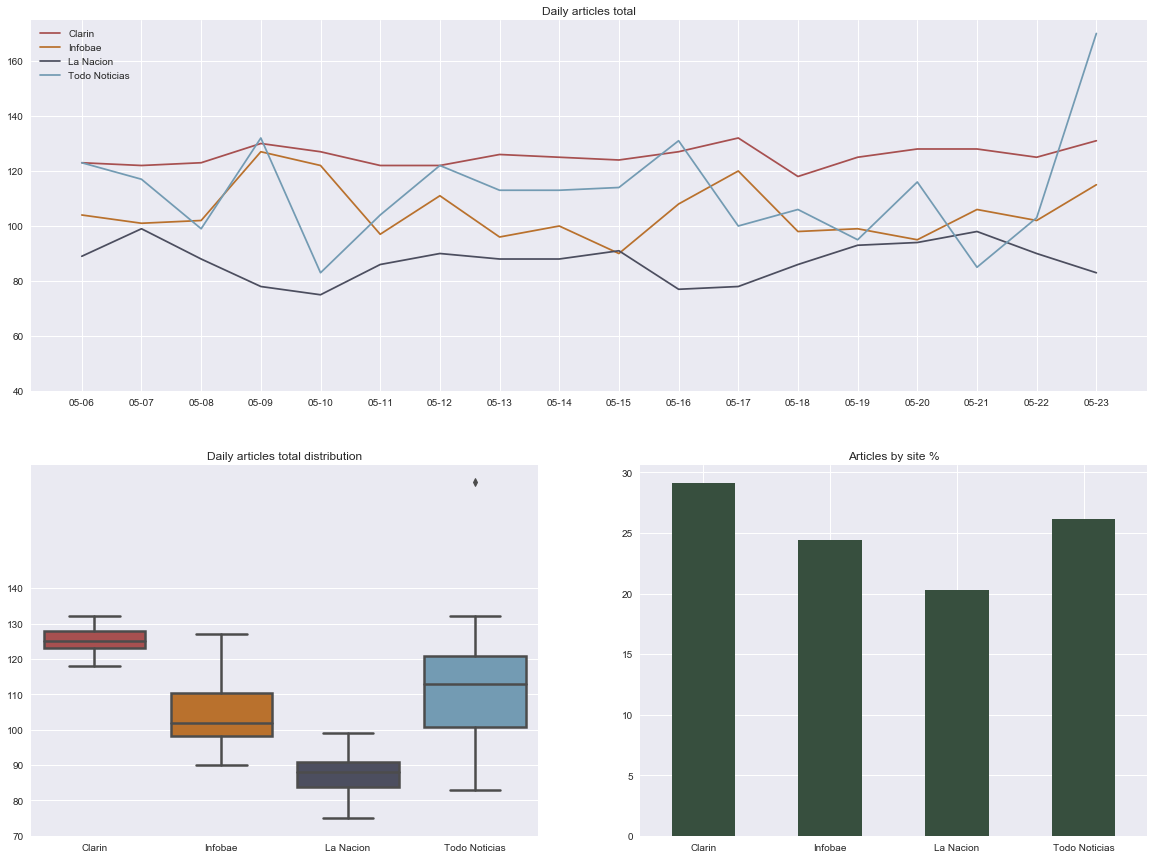

In [14]:
#Date labels list
date_labels = [pd.to_datetime(date).strftime("%m-%d") for date in list(df["extraction_date"].unique())]
#Dates list
dates = list(df["extraction_date"].unique())
#Sliced df
def sliced_df(slc):
    s_df = pd.DataFrame(columns=df.columns)
    for key in media_name_list:
        media_slice = df.groupby("media_name").get_group(key)
        for date in dates:
            date_slice = media_slice.groupby("extraction_date").get_group(date)
            pieces = [s_df, date_slice[:slc]]
            s_df = pd.concat(pieces)
    s_df.reset_index(drop=True, inplace=True)
    return s_df

total_art_day = lambda x: df[df["media_name"]==x].groupby(["extraction_date"]).agg({"article_name":"count"})
total_art_media = df.groupby(["media_name"])["article_name"].count() 
perc_art_media = total_art_media.apply(lambda x: (x * 100)/total_art_media.sum())

plt.style.use("seaborn")
fig = plt.figure(figsize=(20, 15))
gs = GridSpec(2, 2)

ax = fig.add_subplot(gs[0, :2])
for key in media_name_list:
    ax.plot(total_art_day(key), color=media_name_list[key][1])
ax.set_title("Daily articles total")
ax.legend([media_name_list[key][0] for key in media_name_list])
ax.set_xticks(dates), ax.set_xticklabels(date_labels)
ax.set_yticks(np.arange(40, 170, 20))


ax1 = fig.add_subplot(gs[1, 0])
values_bydate = df.groupby(["extraction_date", "media_name"])["article_name"].count().reset_index()
sns.boxplot(x="media_name", y="article_name", data=values_bydate, linewidth=2.5)
ax1.set_yticks(np.arange(70, 150, 10)), ax1.set_ylabel("")
ax1.set_xticklabels([media_name_list[key][0] for key in media_name_list]), ax1.set_xlabel("")
ax1.set_title("Daily articles total distribution")
idx = 0
for name in media_name_list:
    box = ax1.artists[idx]
    box.set_facecolor(media_name_list[name][1])
    idx += 1

ax2 = fig.add_subplot(gs[1, 1])
ax2.set_title("Articles by site %")
perc_art_media.plot.bar(color="#374F3E")
ax2.set_xticklabels([media_name_list[key][0] for key in media_name_list], rotation="horizontal"), ax2.set_xlabel("")

plt.show()

The line plot shows that the amount sampled has been relatively consistent through the accounted period and the bar chart shows that proportions are similar between each media subset.

#### <font color="#0F1518">4.2 Topics</font>

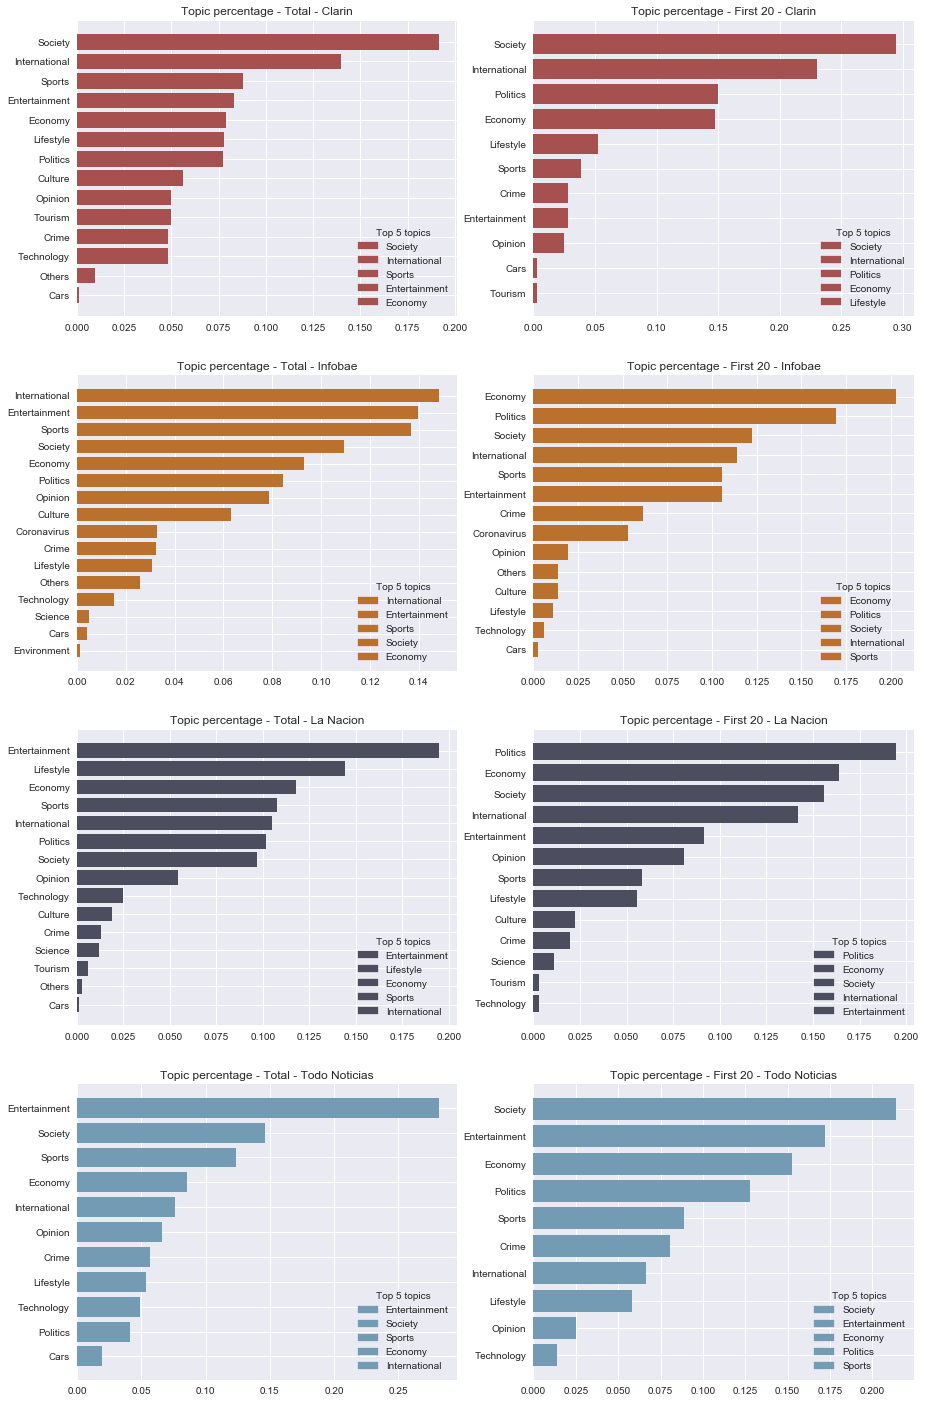

In [15]:
fig = plt.figure(figsize=(15, 25))
gs = GridSpec(4, 2)  

def perc_topic():
    idx = 0
    def barh_func(df, title, idx):
        total_xtopic = df.loc[df["media_name"]==name]["topic"].value_counts()
        perc_xtopic = (total_xtopic.apply(lambda x: round(x / total_xtopic.sum(), 4))).sort_values()
        ax = fig.add_subplot(gs[idx])
        ax.barh(perc_xtopic.index, perc_xtopic.to_list(), color=media_name_list[name][1])
        ax.set_title(f"{title} - {media_name_list[name][0]}")
        ax.set_ylabel("")
        labels = [topic.capitalize() for topic in perc_xtopic.sort_values(ascending=False).head().index.to_list()]
        patches = [mpatches.Patch(color=media_name_list[name][1]) for i in labels]
        plt.legend(patches, labels, title="Top 5 topics")
    for name in media_name_list:
        barh_func(df, "Topic percentage - Total", idx)
        idx += 1
        barh_func(sliced_df(20), "Topic percentage - First 20", idx)
        idx += 1
        
perc_topic()
plt.show()

**<font color="#0F1518">4.3 Covid-19</font>**

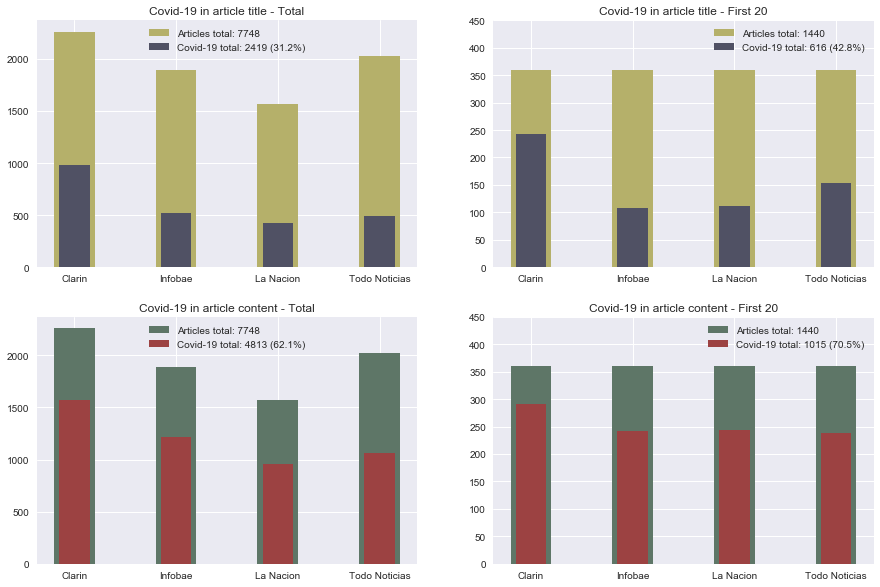

In [16]:
fig = plt.figure(figsize=(15, 10))
gs = GridSpec(2, 2)

def covid_bar(df, plotidx, title, condition, colors):
    if condition == "content_article":
        df_covid = df.loc[df["covid_in_article"]==True]
    if condition == "title_article":
        df_covid = df.loc[(df["article_name"].str.contains("coronavirus"))| (df["article_name"].str.contains("cuarentena"))|(df["article_name"].str.contains("covid"))]
    covid_xmedia = df_covid.groupby("media_name")["article_name"].count()
    total_xmedia = df.groupby("media_name")["article_name"].count()
    ax = fig.add_subplot(plotidx)
    ax.bar(total_xmedia.index, total_xmedia.to_list(), width=0.4, color=colors[0])
    ax.bar(covid_xmedia.index, covid_xmedia.to_list(), width=0.3, color=colors[1])
    ax.set_title(title)
    ax.set_xticklabels([media_name_list[key][0] for key in media_name_list])
    plt.legend([f"Articles total: {total_xmedia.sum()}",  f"Covid-19 total: {covid_xmedia.sum()} ({round(covid_xmedia.sum()/total_xmedia.sum()*100, 1)}%)"])
    return ax

#Subplot1
ax = covid_bar(df, gs[0], "Covid-19 in article title - Total", "title_article", ["#B5B06A", "#505164"])
#Subplot2
ax1 = covid_bar(sliced_df(20), gs[1], "Covid-19 in article title - First 20", "title_article", ["#B5B06A", "#505164"])
yticks = list(ax1.get_yticks()) + [ax1.get_yticks()[-1]+50]
ax1.set_yticks(yticks)
#Subplot3
ax2 = covid_bar(df, gs[2], "Covid-19 in article content - Total", "content_article", ["#5E7667", "#9C4242"])
#Subplot4
ax3 = covid_bar(sliced_df(20), gs[3], "Covid-19 in article content - First 20", "content_article", ["#5E7667", "#9C4242"])
yticks = list(ax3.get_yticks()) + [ax3.get_yticks()[-1]+50]
ax3.set_yticks(yticks)
plt.show()

**<font color="#0F1518">4.3.1 Covid-19 by topic</font>**

In [ ]:
fig = plt.figure(figsize=(15, 25))
gs = GridSpec(4, 2)  

def covid_topic():
    idx = 0
    def barh_func(df, title, idx):
        covid_topic = df[(df["covid_in_article"]==True)&(df["media_name"]==name)].groupby("topic").agg({"article_name":"count"})
        covid_topic.sort_values("article_name", inplace=True)
        ax = fig.add_subplot(gs[idx])
        ax.barh(covid_topic.index, covid_topic["article_name"].to_list(), color=media_name_list[name][1])
        ax.set_title(f"{title} - {media_name_list[name][0]}")
        ax.set_ylabel("")
        labels = [topic.capitalize() for topic in covid_topic.sort_values("article_name", ascending=False).head().index.to_list()]
        patches = [mpatches.Patch(color=media_name_list[name][1]) for i in labels]
        plt.legend(patches, labels, title="Top 5 topics")
    for name in media_name_list:
        barh_func(df, "Covid-19 by topic - Total", idx)
        idx += 1
        barh_func(sliced_df(20), "Covid-19 by topic - First 20 articles", idx)
        idx += 1
        
covid_topic()
plt.show()

## <font color="#0F1518">Conclusion</font>

como desafio futuro implementar machine learning algorithms para identificar palabras clave y poder definir el topic de cada articulo con mas presicion, ya que aunque no creo que modifique el resultado de mi analisis en terminos generales, si va a poder brindar mayor precision, debido a la falta de rigurosidad a la hora de clasificar los sarticulos por parte de los periodiocs
this numbers are to be worried. If we were talking about a highly developed country with not many issues its ok that the people are more interested in entertainment that in politics. But for a country that desperately needs to change it course, is a sad.
hay correlacion entre la cantidad de contagios y muertes oficiales por coronavirus y la cantidad de articulos de coronavirus? Para ser un pais en depresion economica y con problemas politicos y sociales es significativo que se ponga el foco en algo que hasta el momento no esta impactando fuertemente en el pais.
What happened to politics or economics? Only about coronavirus?
is argentine a highly politizied country?
at what point are votes with fundament? Perhaps is more important the quality of the vote than the cuantity, altohough it might not be warranty of being a correct choice. Take in consideration the amount of people that voted last elections. what percentage of news are politics?


## <font color="#0F1518">Appendix</font>

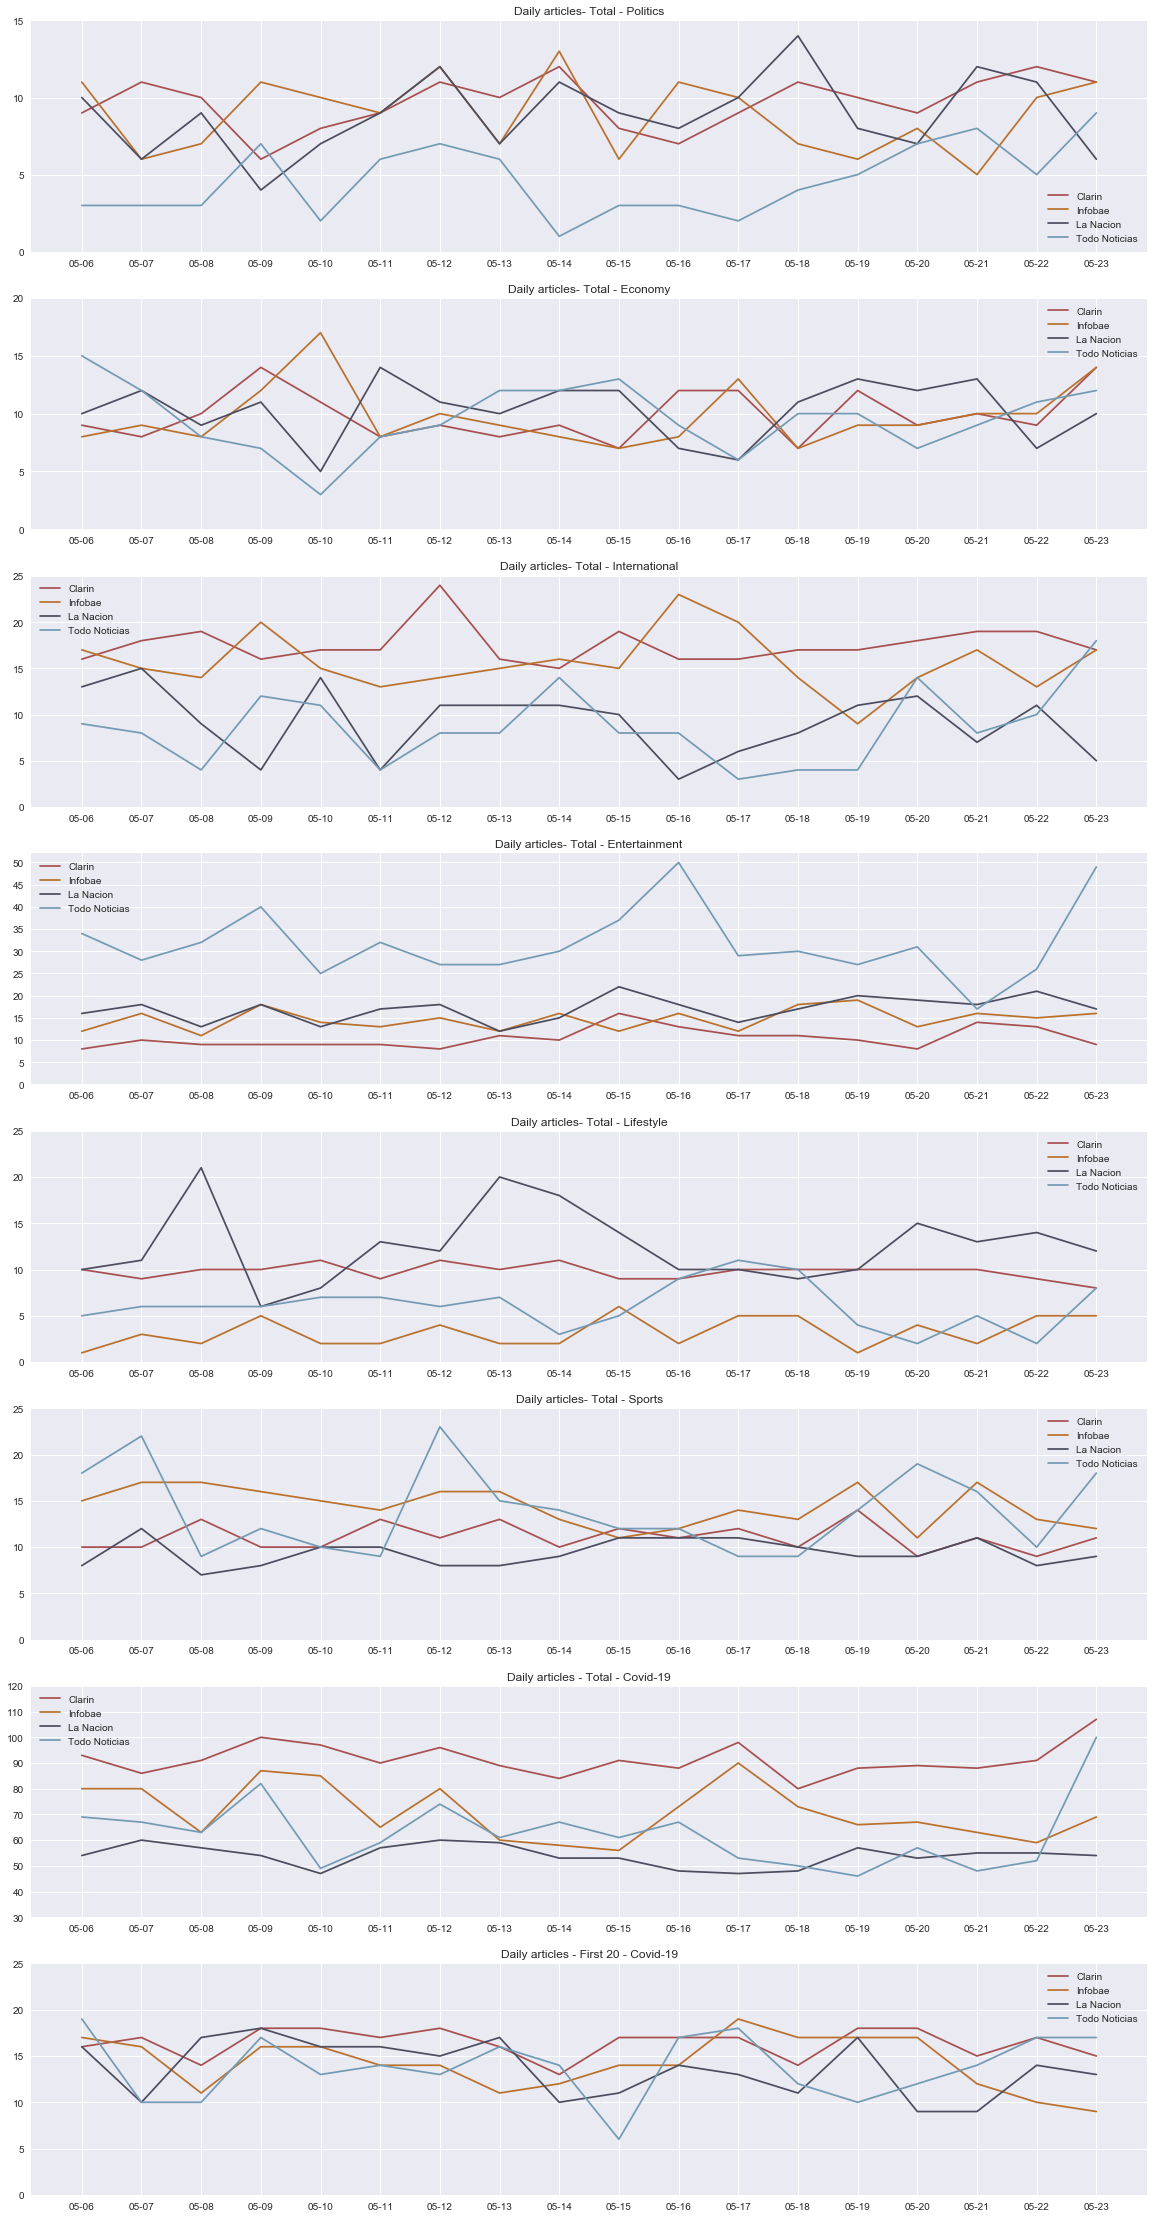

In [17]:
main_topics = ["Politics", "Economy", "International", "Entertainment", "Lifestyle", "Sports"]
total_art_day = lambda n, p: df.groupby("media_name").get_group(n).groupby("topic").get_group(p).groupby("extraction_date").agg({"article_name":"count"})
total_art_media_day = lambda p: df.groupby("topic").get_group(p).groupby(["media_name", "extraction_date"]).agg({"article_name":"count"})

fig = plt.figure(figsize=(20, 40))
gs = GridSpec(8, 1)

idx = 0
for topic in main_topics:
    ax = fig.add_subplot(gs[idx, 0])
    for key in media_name_list:
        ax.plot(total_art_day(key, topic), color=media_name_list[key][1])
    ax.set_title(f"Daily articles- Total - {topic}")
    ax.legend([media_name_list[key][0] for key in media_name_list])
    ax.set_xticks(dates), ax.set_xticklabels(date_labels)
    ax.set_yticks(np.arange(0, total_art_media_day(topic).max().item()+5, 5))
    idx += 1

def covid_daily(df, title):
    df_covid = df.loc[(df["covid_in_article"]==True)|(df["article_name"].str.contains("coronavirus"))|(df["article_name"].str.contains("cuarentena"))|(df["article_name"].str.contains("covid"))]
    for name in media_name_list:
        group_date_media_covid = df_covid.groupby("media_name").get_group(name).groupby("extraction_date").agg({"article_name":"count"})
        ax.plot(group_date_media_covid, color=media_name_list[name][1])
    ax.set_title(f"Daily articles - {title} - Covid-19")
    ax.legend([media_name_list[name][0] for name in media_name_list])
    ax.set_xticks(dates), ax.set_xticklabels(date_labels)

ax = fig.add_subplot(gs[6]) 
covid_daily(df, "Total")
ax.set_yticks(np.arange(30, 130, 10))

ax = fig.add_subplot(gs[7])
covid_daily(sliced_df(20), "First 20")
ax.set_yticks(np.arange(0, 30, 5))

plt.show()